In [ ]:
# LLM agent : LLM이 외부 도구를 활용해서 복잡한 task를 수행하는 시스템
# 사용자 요청 --> LLM (추론) --> 도구 선택 --> 도구 실행 --> 결과 해석 --> 응답
# ==> 즉, 툴을 사용함

In [ ]:
# 에이전트 대화 패턴
# user <---> Assistant
# 사용자가 요청 --> 어시스턴트 응답 --> 사용자 피드백 --> ...

# 각 에이전트가 전문 영역을 담당
# Manager --> Agent 1 --> Agent 2 --> Agent 3 --> Manager


In [ ]:
# AutoGen 프레임 웍
# 마이크로소프트에서 개발
# 에이턴트가 대화를 통한 협업
# 코드 생성 및 실행 자동화

# AssistantAgent : 지시에 따라서 작업을 수행
# UserProxyAgent : 사용자 역할, 코드 실행
# GroupChatManager : 여러 에이전트 조율

In [ ]:
# %pip install autogen

In [4]:
# api 설정
import os, autogen
from dotenv import load_dotenv
load_dotenv()

config_list = [
    {
        'model' : "gpt-4o-mini",
        'api_key' : os.environ["OPENAI_API_KEY"]
    }
]

llm_config = {
    'config_list' : config_list,
    'temperature' : 0
}

# Assistant Agent
assistant = autogen.AssistantAgent(
        name = "Assistant",
        llm_config=llm_config,
        system_message="너는 친절한 ai 에이전트야"
)

# user proxy 에이전트
user_proxy = autogen.UserProxyAgent(
        name = "user_proxy",
        human_input_mode= 'ALWAYS', # NAVER : 자동실행  // ALWAYS 사용자에게 물어봄
        code_execution_config={
            'work_dir' : 'coding', # 작업영역 : 코딩
            'use_docker' : False
        }
)

# 대화
user_proxy.initiate_chat(
    assistant,
    message= " 파이썬으로 팩토리얼 함수 작성해줘",
    single_round = True # 단일 라운드만 수행
)


user_proxy (to Assistant):

 파이썬으로 팩토리얼 함수 작성해줘

--------------------------------------------------------------------------------
Assistant (to user_proxy):

물론입니다! 파이썬에서 팩토리얼 함수를 작성하는 방법은 여러 가지가 있지만, 가장 기본적인 재귀 함수를 사용한 예제를 보여드리겠습니다.

```python
def factorial(n):
    if n < 0:
        raise ValueError("음수의 팩토리얼은 정의되지 않습니다.")
    elif n == 0 or n == 1:
        return 1
    else:
        return n * factorial(n - 1)

# 사용 예시
print(factorial(5))  # 출력: 120
```

위의 코드에서 `factorial` 함수는 입력값 `n`이 0 또는 1일 때 1을 반환하고, 그 외의 경우에는 `n`과 `n-1`의 팩토리얼을 곱하여 반환합니다. 음수에 대한 예외 처리를 추가하여 음수의 팩토리얼은 정의되지 않음을 알리고 있습니다.

반복문을 사용한 방법도 있습니다:

```python
def factorial(n):
    if n < 0:
        raise ValueError("음수의 팩토리얼은 정의되지 않습니다.")
    
    result = 1
    for i in range(2, n + 1):
        result *= i
    return result

# 사용 예시
print(factorial(5))  # 출력: 120
```

이 두 가지 방법 중에서 원하는 방법을 선택하여 사용하시면 됩니다!

--------------------------------------------------------------------------------

>>>>>>>> TERMINATING RUN (4c470e62

ChatResult(chat_id=231847435244217508343729205394856938066, chat_history=[{'content': ' 파이썬으로 팩토리얼 함수 작성해줘', 'role': 'assistant', 'name': 'user_proxy'}, {'content': '물론입니다! 파이썬에서 팩토리얼 함수를 작성하는 방법은 여러 가지가 있지만, 가장 기본적인 재귀 함수를 사용한 예제를 보여드리겠습니다.\n\n```python\ndef factorial(n):\n    if n < 0:\n        raise ValueError("음수의 팩토리얼은 정의되지 않습니다.")\n    elif n == 0 or n == 1:\n        return 1\n    else:\n        return n * factorial(n - 1)\n\n# 사용 예시\nprint(factorial(5))  # 출력: 120\n```\n\n위의 코드에서 `factorial` 함수는 입력값 `n`이 0 또는 1일 때 1을 반환하고, 그 외의 경우에는 `n`과 `n-1`의 팩토리얼을 곱하여 반환합니다. 음수에 대한 예외 처리를 추가하여 음수의 팩토리얼은 정의되지 않음을 알리고 있습니다.\n\n반복문을 사용한 방법도 있습니다:\n\n```python\ndef factorial(n):\n    if n < 0:\n        raise ValueError("음수의 팩토리얼은 정의되지 않습니다.")\n    \n    result = 1\n    for i in range(2, n + 1):\n        result *= i\n    return result\n\n# 사용 예시\nprint(factorial(5))  # 출력: 120\n```\n\n이 두 가지 방법 중에서 원하는 방법을 선택하여 사용하시면 됩니다!', 'role': 'user', 'name': 'Assistant'}], summary='물론입니다! 파이썬에서 팩토리얼 함수를 작성하는

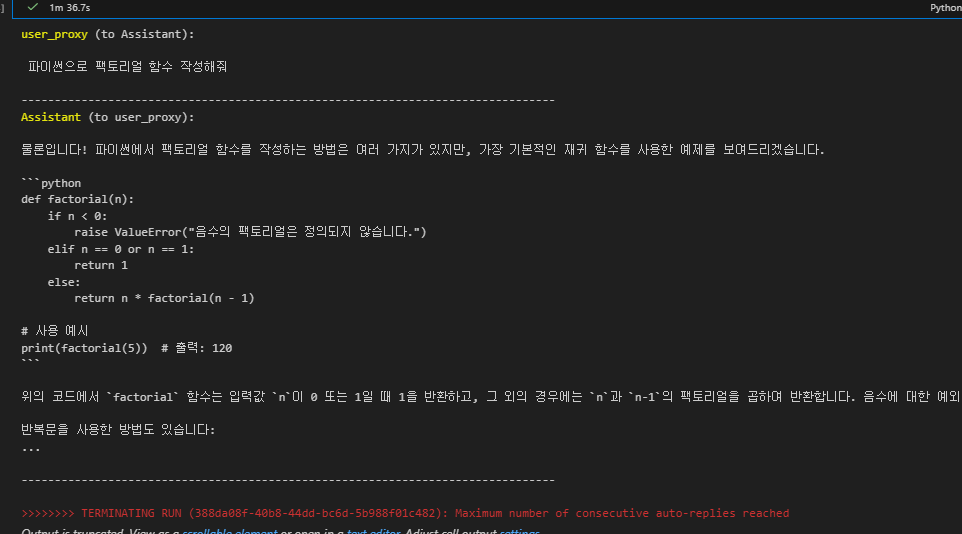

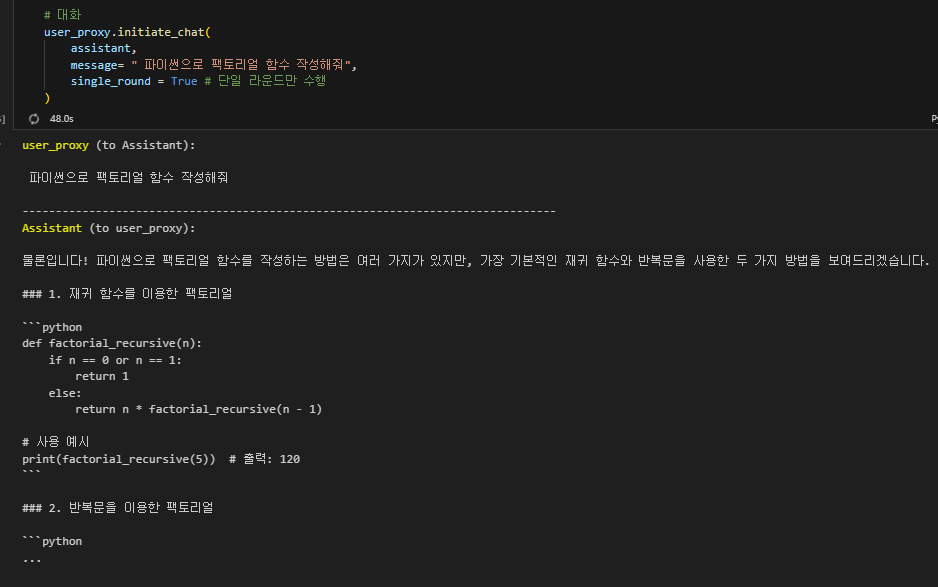

In [ ]:
# 코드 실행 에이전트
import autogen

# 종료 조건 설정
def is_termination_msg(msg):
    content = msg.get('content', "")
    return content and content.strip().endswith('TERMINATE')



# Assistant 에이전트
assistant = autogen.AssistantAgent(
        name = "Assistant",
        llm_config=llm_config,
        system_message="너는 친절한 ai 에이전트야"
)



# user proxy 에이전트
user_proxy = autogen.UserProxyAgent(
        name = "user_proxy",
        is_termination_msg=is_termination_msg,
        human_input_mode= 'NEVER', # 자동실행
        code_execution_config={
            'work_dir' : 'workspace', 
            'use_docker' : False
        }
)



# Task 실행
user_proxy.initiate_chat(
    assistant,
    message= "삼성전자의 최근 3개월치 주식 데이터를 가져와서 분석하고 시각화 해줘",
)

user_proxy (to Assistant):

삼성전자의 최근 3개월치 주식 데이터를 가져와서 분석하고 시각화 해줘

--------------------------------------------------------------------------------
Assistant (to user_proxy):

죄송하지만, 실시간 데이터나 특정 주식의 최근 데이터를 직접 가져올 수는 없습니다. 그러나 삼성전자의 주식 데이터를 분석하고 시각화하는 방법에 대해 안내해드릴 수 있습니다. 

1. **데이터 수집**: Yahoo Finance, Google Finance, 또는 증권사 API를 통해 삼성전자의 주식 데이터를 다운로드할 수 있습니다. 예를 들어, Yahoo Finance에서 CSV 파일로 데이터를 다운로드할 수 있습니다.

2. **데이터 분석**:
   - **기초 통계량**: 평균, 중간값, 표준편차 등을 계산하여 주식의 전반적인 성과를 파악합니다.
   - **변동성 분석**: 주가의 변동성을 분석하여 위험도를 평가합니다.
   - **추세 분석**: 이동 평균(Moving Average) 등을 사용하여 주가의 추세를 분석합니다.

3. **시각화**:
   - **선 그래프**: 주가의 변화를 시간에 따라 시각화합니다.
   - **히스토그램**: 주가의 분포를 시각화합니다.
   - **상관관계 그래프**: 다른 지표와의 상관관계를 분석합니다.

### 예시 코드 (Python 사용)

```python
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

# 삼성전자 주식 데이터 다운로드
ticker = '005930.KS'  # 삼성전자의 티커
data = yf.download(ticker, period='3mo')

# 기초 통계량
print(data.describe())

# 주가 시각화
plt.figure(figsize=(14, 7))
plt.plot(

Exception in thread Thread-214 (_readerthread):
Traceback (most recent call last):
  File "c:\Users\playdata2\miniconda3\envs\OPENAI\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\playdata2\miniconda3\envs\OPENAI\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "c:\Users\playdata2\miniconda3\envs\OPENAI\lib\subprocess.py", line 1515, in _readerthread
    buffer.append(fh.read())
  File "c:\Users\playdata2\miniconda3\envs\OPENAI\lib\codecs.py", line 322, in decode
    (result, consumed) = self._buffer_decode(data, self.errors, final)
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb7 in position 3: invalid start byte


user_proxy (to Assistant):

exitcode: 1 (execution failed)
Code output: 


--------------------------------------------------------------------------------
Assistant (to user_proxy):

코드 실행 중 오류가 발생한 것 같아 안타깝습니다. 오류 메시지가 없어서 정확한 원인을 파악하기 어려운데요, 몇 가지 점검 사항과 해결 방법을 안내해 드리겠습니다.

### 1. Python 환경 확인
- Python이 제대로 설치되어 있는지 확인하세요. 터미널이나 명령 프롬프트에서 `python --version` 또는 `python3 --version`을 입력하여 버전을 확인할 수 있습니다.

### 2. 가상 환경 사용
- 가상 환경을 사용하여 패키지를 관리하는 것이 좋습니다. 아래 명령어로 가상 환경을 만들고 활성화할 수 있습니다.

```bash
# 가상 환경 생성
python -m venv myenv

# 가상 환경 활성화 (Windows)
myenv\Scripts\activate

# 가상 환경 활성화 (macOS/Linux)
source myenv/bin/activate
```

### 3. 필요한 패키지 설치
가상 환경을 활성화한 후, 필요한 패키지를 설치합니다.

```bash
pip install yfinance matplotlib pandas
```

### 4. 코드 실행
패키지를 설치한 후, 이전에 제공한 코드를 다시 실행해 보세요.

### 5. 오류 메시지 확인
- 만약 여전히 오류가 발생한다면, 오류 메시지를 확인하고 그 내용을 공유해 주시면 더 구체적인 도움을 드릴 수 있습니다.

이 방법으로도 문제가 해결되지 않으면, 어떤 환경에서 코드를 실행하고 있는지(예: Jupyter Notebook, Python 스크립트 등)와 함께 오류 메시지를 알려주시면 더 나은 지원을 제공할 수 있습니다.

--------

Exception in thread Thread-216 (_readerthread):
Traceback (most recent call last):
  File "c:\Users\playdata2\miniconda3\envs\OPENAI\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\playdata2\miniconda3\envs\OPENAI\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "c:\Users\playdata2\miniconda3\envs\OPENAI\lib\subprocess.py", line 1515, in _readerthread
    buffer.append(fh.read())
  File "c:\Users\playdata2\miniconda3\envs\OPENAI\lib\codecs.py", line 322, in decode
    (result, consumed) = self._buffer_decode(data, self.errors, final)
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb7 in position 3: invalid start byte


user_proxy (to Assistant):

exitcode: 1 (execution failed)
Code output: 


--------------------------------------------------------------------------------
Assistant (to user_proxy):

코드 실행 중 오류가 발생하고 있는 것 같아 안타깝습니다. 오류 메시지가 제공되지 않아 구체적인 원인을 파악하기 어렵지만, 몇 가지 일반적인 문제 해결 방법을 제안해 드리겠습니다.

### 1. IDE 또는 환경 확인
- 어떤 IDE(예: Jupyter Notebook, PyCharm, VSCode 등)에서 코드를 실행하고 있는지 확인해 주세요. 각 환경에 따라 설정이 다를 수 있습니다.

### 2. 패키지 설치 확인
- `yfinance`, `matplotlib`, `pandas`가 제대로 설치되었는지 확인합니다. 아래 명령어를 사용하여 설치된 패키지를 확인할 수 있습니다.

```bash
pip list
```

### 3. 코드 실행 방법
- 코드를 실행할 때, 전체 코드를 복사하여 붙여넣기 했는지 확인하세요. 코드의 일부만 실행하면 오류가 발생할 수 있습니다.

### 4. Python 버전 확인
- Python 3.x 버전이 설치되어 있는지 확인하세요. `yfinance`와 `matplotlib`는 Python 3.x에서 잘 작동합니다.

### 5. 오류 메시지 확인
- 오류 메시지가 없어서 문제를 파악하기 어렵습니다. 만약 IDE에서 오류 메시지를 확인할 수 있다면, 그 내용을 공유해 주시면 더 구체적인 도움을 드릴 수 있습니다.

### 6. 대체 방법
- 만약 계속해서 문제가 발생한다면, 다른 방법으로 데이터를 수집하고 분석할 수 있습니다. 예를 들어, CSV 파일로 데이터를 다운로드한 후, 로컬에서 분석할 수 있습니다.

```python
import pandas as pd
import matplotlib.pyplot

Exception in thread Thread-218 (_readerthread):
Traceback (most recent call last):
  File "c:\Users\playdata2\miniconda3\envs\OPENAI\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\playdata2\miniconda3\envs\OPENAI\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "c:\Users\playdata2\miniconda3\envs\OPENAI\lib\subprocess.py", line 1515, in _readerthread
    buffer.append(fh.read())
  File "c:\Users\playdata2\miniconda3\envs\OPENAI\lib\codecs.py", line 322, in decode
    (result, consumed) = self._buffer_decode(data, self.errors, final)
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb7 in position 3: invalid start byte


user_proxy (to Assistant):

exitcode: 1 (execution failed)
Code output: 


--------------------------------------------------------------------------------
Assistant (to user_proxy):

계속해서 문제가 발생하고 있는 것 같아 안타깝습니다. 오류 메시지가 없어서 구체적인 원인을 파악하기 어려운 상황입니다. 하지만 몇 가지 추가적인 점검 사항과 대체 방법을 제안해 드리겠습니다.

### 1. 코드 실행 환경 점검
- **Jupyter Notebook**: 셀을 하나씩 실행하고, 각 셀에서 오류가 발생하는지 확인해 보세요.
- **Python 스크립트**: 전체 코드를 하나의 `.py` 파일로 저장한 후, 터미널에서 실행해 보세요.

### 2. 패키지 설치 확인
- 아래 명령어로 설치된 패키지를 확인하고, 필요한 패키지가 모두 설치되어 있는지 확인하세요.

```bash
pip list
```

### 3. 간단한 코드 테스트
- 아래의 간단한 코드를 실행해 보세요. 이 코드는 기본적인 `matplotlib`와 `pandas` 기능을 테스트합니다.

```python
import pandas as pd
import matplotlib.pyplot as plt

# 간단한 데이터 생성
data = {'날짜': pd.date_range(start='2023-01-01', periods=10),
        '주가': [100, 102, 101, 105, 107, 110, 108, 111, 115, 117]}
df = pd.DataFrame(data)
df.set_index('날짜', inplace=True)

# 주가 시각화
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['주가'], marker='o')
plt.title('주가 시각화 예제')
plt.xlabel('날짜')
plt.

Exception in thread Thread-220 (_readerthread):
Traceback (most recent call last):
  File "c:\Users\playdata2\miniconda3\envs\OPENAI\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\playdata2\miniconda3\envs\OPENAI\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "c:\Users\playdata2\miniconda3\envs\OPENAI\lib\subprocess.py", line 1515, in _readerthread
    buffer.append(fh.read())
  File "c:\Users\playdata2\miniconda3\envs\OPENAI\lib\codecs.py", line 322, in decode
    (result, consumed) = self._buffer_decode(data, self.errors, final)
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb7 in position 3: invalid start byte


user_proxy (to Assistant):

exitcode: 1 (execution failed)
Code output: 


--------------------------------------------------------------------------------
Assistant (to user_proxy):

계속해서 문제가 발생하고 있는 것 같아 안타깝습니다. 오류 메시지가 없어서 구체적인 원인을 파악하기 어려운 상황입니다. 하지만 몇 가지 추가적인 점검 사항과 대체 방법을 제안해 드리겠습니다.

### 1. 코드 실행 환경 점검
- **Jupyter Notebook**: 셀을 하나씩 실행하고, 각 셀에서 오류가 발생하는지 확인해 보세요.
- **Python 스크립트**: 전체 코드를 하나의 `.py` 파일로 저장한 후, 터미널에서 실행해 보세요.

### 2. 패키지 설치 확인
- 아래 명령어로 설치된 패키지를 확인하고, 필요한 패키지가 모두 설치되어 있는지 확인하세요.

```bash
pip list
```

### 3. 간단한 코드 테스트
- 아래의 간단한 코드를 실행해 보세요. 이 코드는 기본적인 `matplotlib`와 `pandas` 기능을 테스트합니다.

```python
import pandas as pd
import matplotlib.pyplot as plt

# 간단한 데이터 생성
data = {'날짜': pd.date_range(start='2023-01-01', periods=10),
        '주가': [100, 102, 101, 105, 107, 110, 108, 111, 115, 117]}
df = pd.DataFrame(data)
df.set_index('날짜', inplace=True)

# 주가 시각화
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['주가'], marker='o')
plt.title('주가 시각화 예제')
plt.xlabel('날짜')
plt.

In [ ]:
import autogen

# 도구 사용 에이전트

# 커스텀 도구 정의
def search_web(query):
    return f'{query} 에 대한 검색결과...'
def calculator(exp):
    return eval(exp)

# Function 등록
assistant = autogen.AssistantAgent(
    name = 'assistant',
    llm_config=llm_config
)

# 함수를 에이전트에 등록 
@assistant.register_for_llm(description='web search')
def web_search(query:str) -> str:
    return search_web(query)

@assistant.register_for_llm(description='calc')
def calc(query:str) -> str:
    return calculator(query)


user_proxy = autogen.UserProxyAgent(
    name = 'user_proxy',
    human_input_mode= 'NEVER',
    code_execution_config={"use_docker": False}
)


response1 = assistant.run(
    "use calc to evaluate 128*(10+3)",
    user_proxy=user_proxy,
    tool_use=True
)


print("=== Summary ===")
print(response1.summary)

print("\n=== All Messages ===")
for m in response1.messages:
    print(m)

print("\n=== Tool Outputs ===")
for m in response1.messages:
    if m.get("role") == "tool":
        print(m["content"])


=== Summary ===
None

=== All Messages ===

=== Tool Outputs ===
